<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/FuzzyLogic/FuzzyLogic_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update && apt-get upgrade -y
!pip install scikit-fuzzy matplotlib

5.0


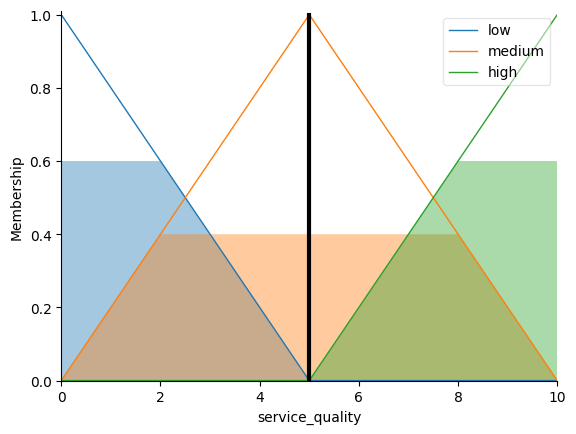

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Định nghĩa các biến đầu vào
wait_time = ctrl.Antecedent(np.arange(0, 11, 1), 'wait_time')
customer_rating = ctrl.Antecedent(np.arange(0, 11, 1), 'customer_rating')

# Định nghĩa các biến đầu ra
service_quality = ctrl.Consequent(np.arange(0, 11, 1), 'service_quality')

# Xác định các hàm xấp xỉ Fuzzy
wait_time['low'] = fuzz.trimf(wait_time.universe, (0, 0, 5))
wait_time['medium'] = fuzz.trimf(wait_time.universe, (0, 5, 10))
wait_time['high'] = fuzz.trimf(wait_time.universe, (5, 10, 10))
customer_rating['low'] = fuzz.trimf(customer_rating.universe, (0, 0, 5))
customer_rating['medium'] = fuzz.trimf(customer_rating.universe, (0, 5, 10))
customer_rating['high'] = fuzz.trimf(customer_rating.universe, (5, 10, 10))
service_quality['low'] = fuzz.trimf(service_quality.universe, (0, 0, 5))
service_quality['medium'] = fuzz.trimf(service_quality.universe, (0, 5, 10))
service_quality['high'] = fuzz.trimf(service_quality.universe, (5, 10, 10))

# Xác định quy tắc Fuzzy
rule1 = ctrl.Rule(wait_time['low'] | customer_rating['low'], service_quality['low'])
rule2 = ctrl.Rule(wait_time['medium'] | customer_rating['medium'], service_quality['medium'])
rule3 = ctrl.Rule(wait_time['high'] | customer_rating['high'], service_quality['high'])

# Xây dựng hệ thống Fuzzy Logic
service_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
service = ctrl.ControlSystemSimulation(service_ctrl)

# Đưa ra các giá trị đầu vào
service.input['wait_time'] = 2
service.input['customer_rating'] = 8

# Đánh giá chất lượng dịch vụ
service.compute()

# In KQ
print(service.output['service_quality'])
service_quality.view(sim=service)

In [ ]:
import numpy as np
import skfuzzy as fuzz

# Tập U gồm 5 ứng cử viên vào chức vụ quản đốc phân xưởng
U = ('U1', 'U2', 'U3', 'U4', 'U5')

# Định nghĩa các biến đàu vào
degree_of_skill = np.arange(0, 1.1, 0.1) # Tiêu chuẩn A- trình độ NV
years_of_experience = np.arange(0, 1.1, 0.1) # Tiêu chuẩn B- kinh nghiệm

# Định nghĩa hàm xấp xỉ Fuzz cho mức độ phù hợp của từng ứng viên với tiêu chuẩn A
membership_degree_A = {
    'U1': fuzz.trimf(degree_of_skill, (0.4, 0.4, 1)),
    'U2': fuzz.trimf(degree_of_skill, (1, 1, 1)),
    'U3': fuzz.trimf(degree_of_skill, (0.8, 1, 1)),
    'U4': fuzz.trimf(degree_of_skill, (0.2, 0.2, 0.6)),
    'U5': fuzz.trimf(degree_of_skill, (0.4, 0.4, 0.8)),
}

# Định nghĩa hàm xấp xỉ Fuzzy cho mức độ p/hợp của từng ứng viên với tiêu chuẩn B
membership_degree_B = {
    'U1': fuzz.trimf(years_of_experience, (0.4, 0.4, 0.8)),
    'U2': fuzz.trimf(years_of_experience, (0.6, 1, 1)),
    'U3': fuzz.trimf(years_of_experience, (1, 1, 1)),
    'U4': fuzz.trimf(years_of_experience, (0, 0, 0.2)),
    'U5': fuzz.trimf(years_of_experience, (0.8, 1, 1)),
}

# Tìm tập con mờ của U những ứng viên thỏa ít nhất 1/2 tiêu chuẩn A/B
membership_at_least_one = {}
for u in U:
  membership_at_least_one[u] = np.fmax(membership_degree_A[u], membership_degree_B[u])


# In KQ
for u in U:
  print(f'Ứng viên {u}:', membership_at_least_one[u])


Ứng viên U1: [0.         0.         0.         0.         1.         0.83333333
 0.66666667 0.5        0.33333333 0.16666667 0.        ]
Ứng viên U2: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.77555756e-16 2.50000000e-01
 5.00000000e-01 7.50000000e-01 1.00000000e+00]
Ứng viên U3: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1. ]
Ứng viên U4: [1.   0.5  1.   0.75 0.5  0.25 0.   0.   0.   0.   0.  ]
Ứng viên U5: [0.   0.   0.   0.   1.   0.75 0.5  0.25 0.   0.5  1.  ]


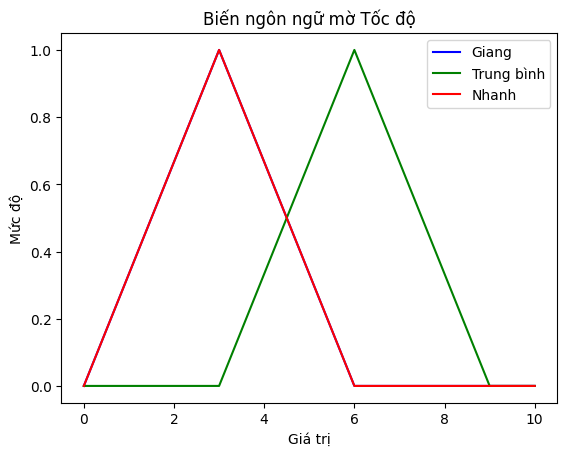

In [ ]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt
import seaborn as sns

# Định nghĩa miền giá trị đầu vào
x = np.arange(0, 11, 1)

# Định nghĩa hàm thành viên của biến ngôn ngữ mờ "Tốc độ"
tieu_chi = ('Giang', 'Trung bình', 'Nhanh')

# Định nghĩa các hàm thành viên của biến ngôn ngữ mờ 'Tốc độ'
tieu_chi_giang = fuzz.trimf(x, (0, 3, 6))
tieu_chi_tb = fuzz.trimf(x, (3, 6, 9))
tieu_chi_nhanh = fuzz.trimf(x, (6, 9, 10))

# In biểu đồ các hàm thành viên của biến n/n mờ 'Tốc độ'
plt.title('Biến ngôn ngữ mờ Tốc độ')
plt.plot(x, tieu_chi_giang, 'b', linewidth=1.5, label='Giang')
plt.plot(x, tieu_chi_tb, 'g', linewidth=1.5, label='Trung bình')
plt.plot(x, tieu_chi_giang, 'r', linewidth=1.5, label='Nhanh')
plt.xlabel('Giá trị')
plt.ylabel('Mức độ')
plt.legend(loc='upper right')
plt.show()